# Chadi-Cohen Tight Binding Program

Originally written in 12/1999. Updated 10/2017.

This program is the tight-binding program for Diamond/Zincblende
structures that is presented in Chadi and Cohen's paper
"Tight-Binding Calculations of the Valence Bands of Diamond and
Zincblende Crystals", Phys. Stat. Soli. (b) 68, 405 (1975).  This
program is written for diamond and zincblende structures only.

Here are some sample band gaps (from Kittel) that may aid in fitting:

|Material | Type | Gap (eV)|
|---|---|------|
|C  |  i| 5.4  |      
|Si |  i| 1.17 |     
|Ge |  i| 0.744|     
|Sn |  d| 0.00 |    
|GaAs| d| 1.52 |
|GaP | i| 2.32 |
|InP | d| 1.42 |
|InAs| d| 0.43 |


In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh
from collections import namedtuple
import itertools
from TB import get_kpoints, band_labels

In [11]:
from collections import namedtuple
Material = namedtuple('Material',['Esc','Esa','Epc','Epa','Vss','Vscp','Vsap','Vxx','Vxy'])
C = Material(0.,0.,7.40,7.40,-15.2,10.25,10.25,3.,8.3)
Si = Material(0,0,7.2,7.2,-8.13,5.88,5.88,3.17,7.51)
Ge = Material(0,0,8.41,8.41,-6.78,5.31,5.31,2.62,6.82)
GaAs = Material(-6.01,-4.79,0.19,4.59,-7.00,7.28,3.70,0.93,4.72)
ZnSe = Material(-8.92,-0.28,0.12,7.42,-6.14,5.47,4.73,0.96,4.38)

In [12]:
def get_H(kx,ky,kz,structure=Si):
    from math import sin,cos,pi
    e_s_c,e_s_a,e_p_c,e_p_a,v_ss,v_sc_p,v_sa_p,v_xx,v_xy = structure 
    kxp,kyp,kzp = kx*pi/2.,ky*pi/2.,kz*pi/2.# The a's cancel here

    g0_real = cos(kxp)*cos(kyp)*cos(kzp)
    g0_imag = -sin(kxp)*sin(kyp)*sin(kzp)
    g1_real = -cos(kxp)*sin(kyp)*sin(kzp)
    g1_imag = sin(kxp)*cos(kyp)*cos(kzp)
    g2_real = -sin(kxp)*cos(kyp)*sin(kzp)
    g2_imag = cos(kxp)*sin(kyp)*cos(kzp)
    g3_real = -sin(kxp)*sin(kyp)*cos(kzp)
    g3_imag = cos(kxp)*cos(kyp)*sin(kzp)
      
    # "s" stands for "star": the complex conjugate
    g0,g0s = g0_real+g0_imag*1j,g0_real-g0_imag*1j
    g1,g1s = g1_real+g1_imag*1j,g1_real-g1_imag*1j
    g2,g2s = g2_real+g2_imag*1j,g2_real-g2_imag*1j
    g3,g3s = g3_real+g3_imag*1j,g3_real-g3_imag*1j
        
    H = np.zeros((8,8),'D')

    # Make the diagonal elements
    H[0,0] = e_s_c
    H[1,1] = e_s_a
    H[2,2] = H[3,3] = H[4,4] = e_p_c
    H[5,5] = H[6,6] = H[7,7] = e_p_a

    # Make the off-diagonal parts
    H[1,0] = v_ss*g0s
    H[0,1] = v_ss*g0

    H[2,1] = -v_sa_p*g1
    H[1,2] = -v_sa_p*g1s
    H[3,1] = -v_sa_p*g2
    H[1,3] = -v_sa_p*g2s
    H[4,1] = -v_sa_p*g3
    H[1,4] = -v_sa_p*g3s

    H[5,0] = v_sc_p*g1s
    H[0,5] = v_sc_p*g1
    H[6,0] = v_sc_p*g2s
    H[0,6] = v_sc_p*g2
    H[7,0] = v_sc_p*g3s
    H[0,7] = v_sc_p*g3

    H[5,2] = v_xx*g0s
    H[2,5] = v_xx*g0
    H[6,2] = v_xy*g3s
    H[2,6] = v_xy*g3
    H[7,2] = v_xy*g2s
    H[2,7] = v_xy*g2

    H[5,3] = v_xy*g3s
    H[3,5] = v_xy*g3
    H[6,3] = v_xx*g0s
    H[3,6] = v_xx*g0
    H[7,3] = v_xy*g1s
    H[3,7] = v_xy*g1

    H[5,4] = v_xy*g2s
    H[4,5] = v_xy*g2
    H[6,4] = v_xy*g1s
    H[4,6] = v_xy*g1
    H[7,4] = v_xx*g0s
    H[4,7] = v_xx*g0
    return H

In [13]:
def get_data(n=10,structure=GaAs):
    data = []
    for kx,ky,kz in get_kpoints(n):
        H = get_H(kx,ky,kz,structure)
        E = eigvalsh(H).real
        data.append(E)
    return np.array(data)

In [14]:
def band(n=25,structure=Si):
    data = get_data(n,structure)
    nk,nplot = data.shape
    for i in range(nplot):
        plt.plot(data[:,i])
    band_labels(n)
    plt.axis(xmax=3*n+1)
    plt.title("Chadi-Cohen band structure")
    plt.ylabel("E (eV)")
    return


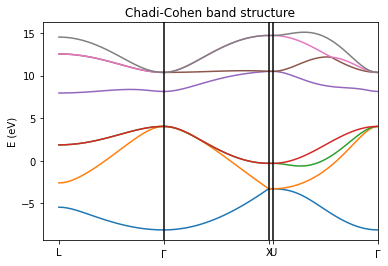

In [15]:
band()